# Project: Investigate a Dataset (Medical Appointment Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Brief Introduction on the Medical Appointment No Shows data.

This dataset for this report consist information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

110,527 medical appointments with its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names will be listed in the data familiarization cells below.

In [1]:
!pip install statsmodels

In [2]:
#Import required library to use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### Questions to be answered

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


### Data Loading

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.



In [3]:
# Load data and print out a few lines.
df=pd.read_csv('./KaggleV2-May-2016.csv', index_col= False)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#The shape of the data set
df.shape

(110527, 14)

The shape of the data is 110527 rows and 14 columns.

In [5]:
#The column names in the data set
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

The columns name above are the list of all the 14 variables present in the datasets.

In [6]:
#Information of the data type of the columns in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information of the data set as printed above, we could observed the column name from PatientID to No-show. 
Also, we have the non-null count column and the column showing the data type of each of the variables in the dataset.

In [7]:
# To check if there are any duplicated rows in the dataset
df.duplicated().value_counts()

False    110527
dtype: int64

The duplicated enquires shows that none of the columns in the dataset has a duplicated rows

<a id='wrangling'></a>
## Data Wrangling 

 - Below we will correct some of the noticed inconsistencies in the dataset:

 - PatientId is an Integer and not Float. So, we will convert it into integer.

 - DataType of ScheduledDay and AppointmentDay will be changed to DateTime.
 
 - Typo's in the Column names will also be corrected.

 - As the AppointmentDay has 00:00:00 in it's TimeStamp. So, we will ignore it.

 - As we removed the Time from AppointmentDay's TimeStamp we will do a similar thing for ScheduledDay also.

In [8]:
# Let's convert the PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

In [9]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

#### Let's check to confirm the effectiveness of the correction we make to some of the variables datatype.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [12]:
#let's change for possible mistake in the age variables
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


#### Since it is not possible to be aged −1, so we can confidently says ages below zero is a mistake. In this case, we should remove it form the dataset.

In [13]:
#Removing the anomalous instance
df.drop(99832, axis=0, inplace= True)

#### From the dataset, let's drop 'PatientId' and 'AppointmentID' from the dataset, we could observed that they are not really given any information. They are just a computer generated digit.

In [14]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
# df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### Let's print the unique values of all the variables (i.e columns) we have in the data set

In [15]:
# Print Unique Values
print("Unique Values in 'Gender' => {}".format(df.Gender.unique()))
print("Unique Values in 'Scholarship' => {}".format(df.Scholarship.unique()))
print("Unique Values in 'Hypertension' => {}".format(df.Hypertension.unique()))
print("Unique Values in 'Diabetes' => {}".format(df.Diabetes.unique()))
print("Unique Values in 'Alcoholism' => {}".format(df.Alcoholism.unique()))
print("Unique Values in 'Handicap' => {}".format(df.Handicap.unique()))
print("Unique Values in 'SMSReceived' => {}".format(df.SMSReceived.unique()))

Unique Values in 'Gender' => ['F' 'M']
Unique Values in 'Scholarship' => [0 1]
Unique Values in 'Hypertension' => [1 0]
Unique Values in 'Diabetes' => [0 1]
Unique Values in 'Alcoholism' => [0 1]
Unique Values in 'Handicap' => [0 1 2 3 4]
Unique Values in 'SMSReceived' => [0 1]


In the dataset the handcap attribute should cointain a boolean value. However, as seen above, this attribute assumes values from 0 to 4 (from the unique value result obtained above). To correct the anomalies, we will map to 1 any value higher than 0.


In [16]:
#Change the Handicap categories to 0 and 1
df['Handicap'] = np.where(df['Handicap']>0, 1,0)

In [17]:
#To check the new unique values of Handicap
df.Handicap.unique()

array([0, 1])

Also, From the above unique values details we can see that all these columns are categories. So, we will convert those columns to object type from int64 their initial datatype.

In [18]:
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hypertension'] = df['Hypertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')

#### Datetime data is a very important variable in the dataset, so let's do some engineering to it. 

In [19]:
## Since both 'AppointmentDay' and 'ScheduledDay' are pandas.Timestamp type, this operation can be done directly:
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']

In [20]:
df['WaitingDays']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: WaitingDays, Length: 110526, dtype: timedelta64[ns]

In [21]:
#Generate a new variable in the dataset
def waiting_days(days):
    arg = str(days) + ' days'
    return pd.Timedelta(arg)

In [22]:
## Checking which instances were scheduled after the appointment:
df[df['WaitingDays'] < waiting_days(0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingDays
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


In [23]:
## Recording the inconsistent instances index 
dropIx = df[df['WaitingDays'] < waiting_days(0)].index
## Dropping these instances from the dataset:
df.drop(dropIx, inplace=True)

In [24]:
#Extract just the day value from the full "timedelta" object.
df['WaitingDays'] = df.WaitingDays.dt.days  

In [25]:
## Grouping by the 'WaitingDays' and 'No_show' values:
waitingdays = df.groupby(by=['WaitingDays','NoShow'])

In [26]:
#Waitingdays with respect to gender valu counts
waitingdays = waitingdays.count()['Gender'].unstack()

In [27]:
##Print the waiting days
waitingdays

NoShow,No,Yes
WaitingDays,,
0,36770.0,1792.0
1,4100.0,1113.0
2,5123.0,1602.0
3,2093.0,644.0
4,4059.0,1231.0
...,...,...
155,4.0,6.0
162,9.0,2.0
169,7.0,1.0


In [28]:
# def min_max_scaling (column) :
#     return (column - column.min()) / (column. max() - column.min())

# for col in df.columns:
#     df[col] = min_max_scaling(df[col])

In [29]:
# min_max_scaling(df['Gender'])

### Let's carry out some descriptive statistics of dataset

In [30]:
#Lets check the counts fo NoShow variables
df['NoShow'].value_counts()

No     88207
Yes    22314
Name: NoShow, dtype: int64

The "NoShow" variables shows that 88208 are for No i.e they showed up for their appointments while 22319 are for Yes, i.e they did not show up for their sheduled appointments.

In [31]:
## Counting gender classes
gender_Count=df.Gender.value_counts()
gender_Count

F    71836
M    38685
Name: Gender, dtype: int64

The above counts shows the number of Male and Female in the dataset.

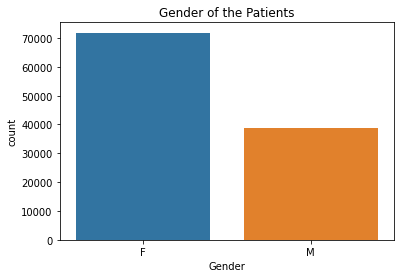

In [32]:
#The plotof the gender conuts in the dataset
ax = sns.countplot(x=df.Gender, data=df)
ax.set_title("Gender of the Patients")
plt.show()

In [33]:
#No show counts according to gender
gender_noshow=df.groupby('NoShow')['Gender'].value_counts()
gender_noshow

NoShow  Gender
No      F         57245
        M         30962
Yes     F         14591
        M          7723
Name: Gender, dtype: int64

In [34]:
# General summary statistics of the age variable
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [35]:
# df['Age'] =[lambda x : (x - x.mean())/ x.std()]

In [36]:
#Average age based on who honor the appointment and who does not. 
df.groupby('NoShow')['Age'].mean()

NoShow
No     37.790504
Yes    34.317872
Name: Age, dtype: float64

<a id='eda'></a>
### Exploratory Data Analysis
Once the data were trimmed and cleaned, we will move on to explore the questions posed at the beginning of the project, "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?"

In [37]:
# Check the total number of unique patients
df.PatientId.nunique()

62298

<li>Number of patients in our data set are 62,298 patient.</li>
<li>PatientId variable has no effect on predicting the probability of Show/No Show of the patient since they are just computer generated digits.</li>

In [38]:
# Check the total number of unique Appointments
df.AppointmentID.nunique()

110521

<li>AppointmentID variable is consistent</li>
<li>AppointmentID variable can also be said to have no effect on predicting the probability of Show/No Show of the patient, since it is also a computer generated digits.</li>

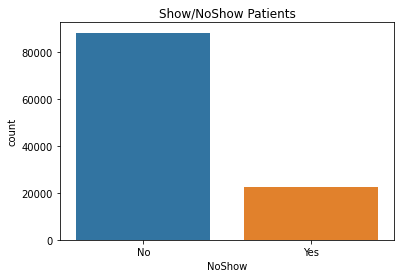

In [39]:
#Bar Plot
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

From the above visualization of the "NoShow" statistics, it was identified that data are unbalanced, it will not be taken into account in the following analysis as it is beyond the scope of this project work.

In [40]:
# Check if numbers of Females and males are balanced 
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

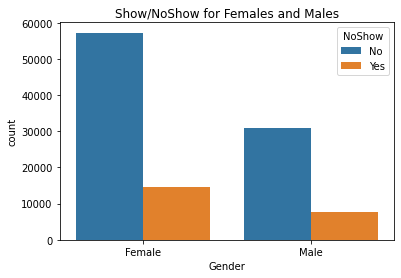

In [41]:
#Bar Plot
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>Gender variable is unbalanced, much more Female patients than Male patients.
<li>From the plot above, both Females and Males have the same proportion for not showing up.
So, Gender is not significant patameter for the probability of Show/No Show.

In [42]:
# Check Age (min, max, average and standard deviation)  
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<li> Averrage Age is 37 years old

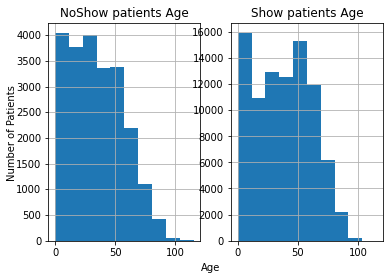

In [43]:
#Plotting of the age distribution of patients in the NoShow data.
fig, axes = plt.subplots(1,2)
df.Age[df["NoShow"] =="Yes"].hist(label='Yes', ax =axes[0])
df.Age[df["NoShow"] =="No"].hist(label='No', ax = axes[1])

axes[0].set_title("NoShow patients Age")
axes[1].set_title("Show patients Age")

fig.text(0.5, 0.02, 'Age', ha='center');
fig.text(0.03, 0.5, 'Number of Patients', va='center', rotation ='vertical');

<li>From the distribution plot, we can see that Age is unbalanced i.e skewed for both the NoShow Patients and Show patients. As we can see we have much more patient from 0 to 60 than from 70 and above.
So, for our analysis we will normalize the numbers.

In [44]:
# Check the number of unique Age values
df['Age'].nunique()

103

since there is 103 unique value for Age and for better insights it's better to convert it into Age Groups

In [45]:
# Convert Age into Age Groups 
bins = [0, 13, 19, 60, 116]
labels = ['Child','Teen','Adult','Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest= False, right= False)

In [46]:
# Check appointement made by Rich people (0) and Poor people (1)
df['Scholarship'].value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

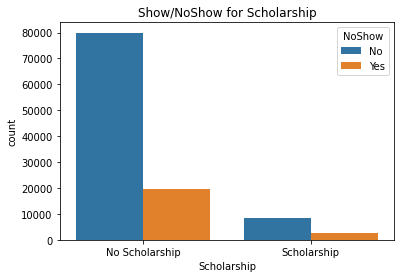

In [47]:
#Bar Plot
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>About 90% of the people made an appointment are without a Scholarship which means they are not poor.

<li>The probability of No Show increase for poor people.
<li>The Scholarship variable is significant for the probabilty of Show/No Show.

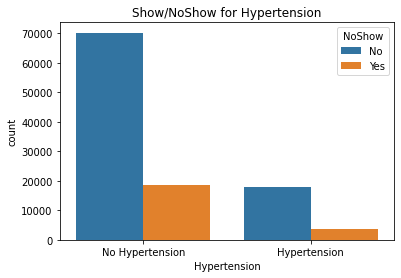

In [48]:
#Bar Plot
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>The probability of No Show decrease for patient with Hipertension.
<li>The Hipertension variable is significant for the probabilty of Show/No Show.

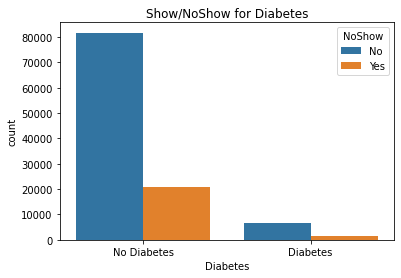

In [49]:
#Bar Plot
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>The probability of No Show decrease for patient with Diabetes.
<li>The Diabetes variable is significant for the probabilty of Show/No Show.

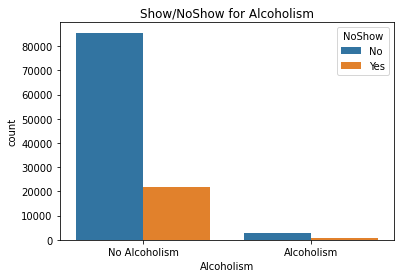

In [50]:
#Bar Plot
ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>Alcoholism patients has decreasing probability of Show/No compare to None Alcoholism patients .
<li>The Alcoholism variable is significant for the probabilty of Show/No Show.

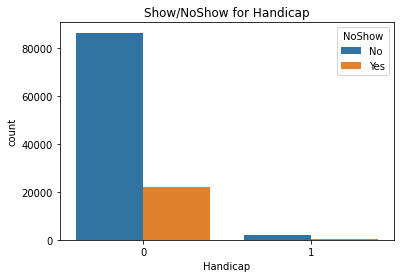

In [51]:
#Bar Plot
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

<li>Patients with handicap condition are most likely to show up.
<li>Patients with no handicap condition are most likely to No Show.
<li>Number of Handcap condition in a patient is a significant for the probabilty of Show/No Show

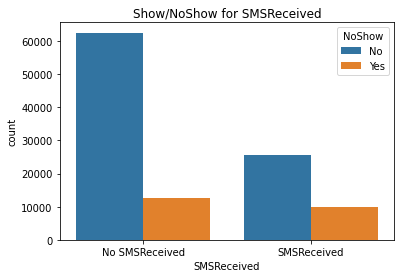

In [52]:
#Bar Plot
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<li>Since most of No Show patients did receive an SMS, SMS_Received has no effect on the probabilty of Show/No Show
<li>SMS_Received Variable is not significant for the probabilty of Show/No Show

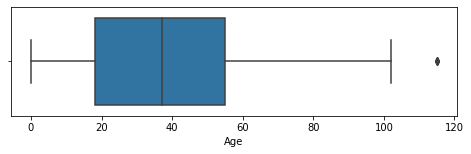

In [53]:
#boxplot for the Age variable to check it's distribution.
plt.figure(figsize=(8,2))
sns.boxplot(x=df.Age);

From the above BoxPlot we can see that the Mean Age is around approxiamtely 37years. The BoxPlot shows few datapoints as outliers.

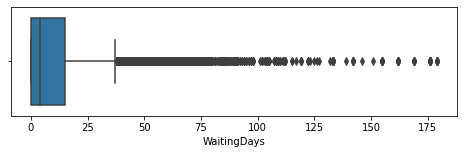

In [54]:
#boxplot for the waiting time variable to check it's distribution.
plt.figure(figsize=(8,2))
sns.boxplot(x=df.WaitingDays);

From the above BoxPlot we can see that the BoxPlot shows so many datapoints as outliers.

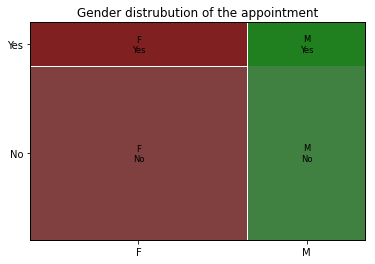

In [55]:
mosaic(df, ['Gender', 'NoShow'], title='Gender distrubution of the appointment')
plt.show()

From the mosaic plot, we can visualize that the number of No show to show with respect to the gender are equal. With this we can confidently says that the variable gender will not be useful in the further analysis.

In [56]:
#Convert the object variables to categorical for numerical computation
df["Gender"] = df["Gender"].astype('category').cat.codes
df["Scholarship"] = df["Scholarship"].astype('category').cat.codes
df["Hypertension"] = df["Hypertension"].astype('category').cat.codes
df["Diabetes"] = df["Diabetes"].astype('category').cat.codes
df["Alcoholism"] = df["Alcoholism"].astype('category').cat.codes
df["Handicap"] = df["Handicap"].astype('category').cat.codes
df["SMSReceived"] = df["SMSReceived"].astype('category').cat.codes
df["NoShow"] = df["NoShow"].astype('category').cat.codes

In [57]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingDays,Age_Group
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Senior
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Adult
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Senior
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Child
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Adult


In [63]:
##Extract the categorical variables and save as another dataframe
df_2=df[['Gender','Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived','WaitingDays','NoShow']]

In [64]:
#Correlation matrix to measure the degree of relationship between the variables and the Target(NoShow) variable.
corr=df_2.corr()
corr

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,WaitingDays,NoShow
Gender,1.000000,-0.106439,-0.114297,-0.055721,-0.032555,0.106170,0.022391,-0.046301,-0.028411,-0.004132
Age,-0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.083827,0.012629,0.034813,-0.060320
Scholarship,-0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.009068,0.001182,-0.030435,0.029166
Hypertension,-0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.084949,-0.006285,-0.017236,-0.035662
Diabetes,-0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.059204,-0.014561,-0.027200,-0.015158
Alcoholism,0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.003715,-0.026154,-0.038527,-0.000181
Handicap,0.022391,0.083827,-0.009068,0.084949,0.059204,0.003715,1.000000,-0.025148,-0.020885,-0.007528
SMSReceived,-0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.025148,1.000000,0.398128,0.126502
WaitingDays,-0.028411,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.020885,0.398128,1.000000,0.186320
NoShow,-0.004132,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.007528,0.126502,0.186320,1.000000


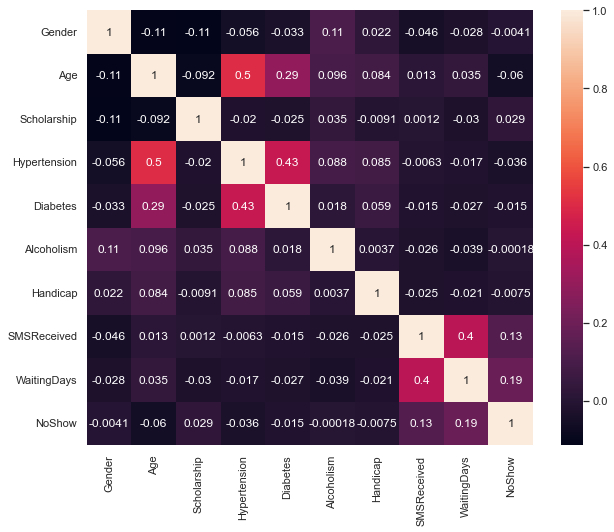

In [74]:
# Correlation matrix visualiztion
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True);

From the correlation plot, we can observe that only the variables "SMSRecieved" and "WaitingDays" have a significance relationship to the "NoShow" variable. 

<a id='conclusions'></a>
## Conclusions

<li>PatientId and AppointmentID has no effect on Show/No Show of the patient. So it can be drop in the futher analysis

<li> Gender is not significant variable for the probability of Show/No Show.

<li>Neighbourhood Variable is not significant for the probabilty of Show/No Show. Since its just the name of the patients.

<li> Scholarship is important factor in predicting if a patient will show up for their scheduled appointment or not.
Not getting Scholarship increases the probability of attending the appointment.

<li>The probabitity of attending appointment increases when patient have Hipertension.

<li>The probabitity of attending appointments increases when the patient have Diabetes.

<li>The Alcoholism variable is significant for the probabilty of Show/No Show.

<li> The probability of attending appointment decreases when patient have Handcap condition.
<li> SMS_Received Variable is not significant for the probabilty of Show/No Show.

<a id='limitations'></a>
## Limitation

<li>During the data set analysis some limitations where found and need to be addressed for better prediction of the probability for No-Show.

<li>The data set didn't tell us the distance between the patient homes and the hospitals or the hospitals capacities.

<li>Some data was dropped from the data due to their unrealistic nature such as Negative Age and Appointment Date prior to schedule Date.

## References



https://www.kaggle.com/datasets/joniarroba/noshowappointments

<style> p{color : red}</style>

<p> dddd</p>